In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [38]:
rcParams['figure.figsize'] = 10, 6


In [39]:
df = pd.read_csv('Trading-features.csv')

In [40]:
df['last_price']

0       43138.2
1       43138.2
2       43138.2
3       43138.2
4       43132.6
         ...   
9995    42753.6
9996    42753.6
9997    42753.6
9998    42753.7
9999    42765.6
Name: last_price, Length: 10000, dtype: float64

In [41]:
print(df.head())
print(df.describe())
print(df.info())

         id  last_price                  created_at        f1     f2    f3  \
0  55466910     43138.2  2023-12-27 12:47:41.916971  0.000463  15139 -43.1   
1  55466909     43138.2  2023-12-27 12:47:40.693372  0.000463  15140 -43.1   
2  55466908     43138.2  2023-12-27 12:47:39.968797  0.000463  15141 -37.4   
3  55466907     43138.2  2023-12-27 12:47:38.919784  0.000463  15142 -37.4   
4  55466906     43132.6  2023-12-27 12:47:37.881533  0.000463  15143 -39.6   

     f4   f5   f6   f7  ...   f152   f153   f154   f155   f156   f157   f158  \
0  43.0 -0.1 -4.8 -5.1  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
1  43.0 -0.1 -4.7 -5.1  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
2  43.0  5.6 -1.9 -0.6  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
3  37.4  0.0 -3.7 -6.2  ...  695.2 -123.8  695.2 -123.8 -123.8  695.2  695.2   
4  36.5 -3.1 -3.7 -9.4  ...  689.6 -129.4  689.6 -129.4 -129.4  689.6  689.6   

    f159   f160   f161  
0 -123.8 -123.8  695.2  


In [42]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 id            0
last_price    0
created_at    0
f1            0
f2            0
             ..
f157          0
f158          0
f159          0
f160          0
f161          0
Length: 164, dtype: int64


In [46]:
df.dropna(inplace=True)

In [47]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [8]:
df['date'] = df['created_at'].dt.strftime('%Y-%m-%d')
df['created_at'] = df['created_at'].dt.strftime('%H:%M:%S')

In [9]:
df.set_index('created_at', inplace=True)


In [10]:
print(df.head())

                  id  last_price        f1     f2    f3    f4   f5   f6   f7  \
created_at                                                                     
12:47:41    55466910     43138.2  0.000463  15139 -43.1  43.0 -0.1 -4.8 -5.1   
12:47:40    55466909     43138.2  0.000463  15140 -43.1  43.0 -0.1 -4.7 -5.1   
12:47:39    55466908     43138.2  0.000463  15141 -37.4  43.0  5.6 -1.9 -0.6   
12:47:38    55466907     43138.2  0.000463  15142 -37.4  37.4  0.0 -3.7 -6.2   
12:47:37    55466906     43132.6  0.000463  15143 -39.6  36.5 -3.1 -3.7 -9.4   

              f8  ...   f153   f154   f155   f156   f157   f158   f159   f160  \
created_at        ...                                                           
12:47:41    -4.3  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:40    -2.4  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:39    -2.4  ... -123.8  695.2 -123.8 -123.8  695.2  695.2 -123.8 -123.8   
12:47:38   -10.2  ... -123.8  695.

In [11]:
print("Minimum date:", df['date'].min())

Minimum date: 2023-12-27


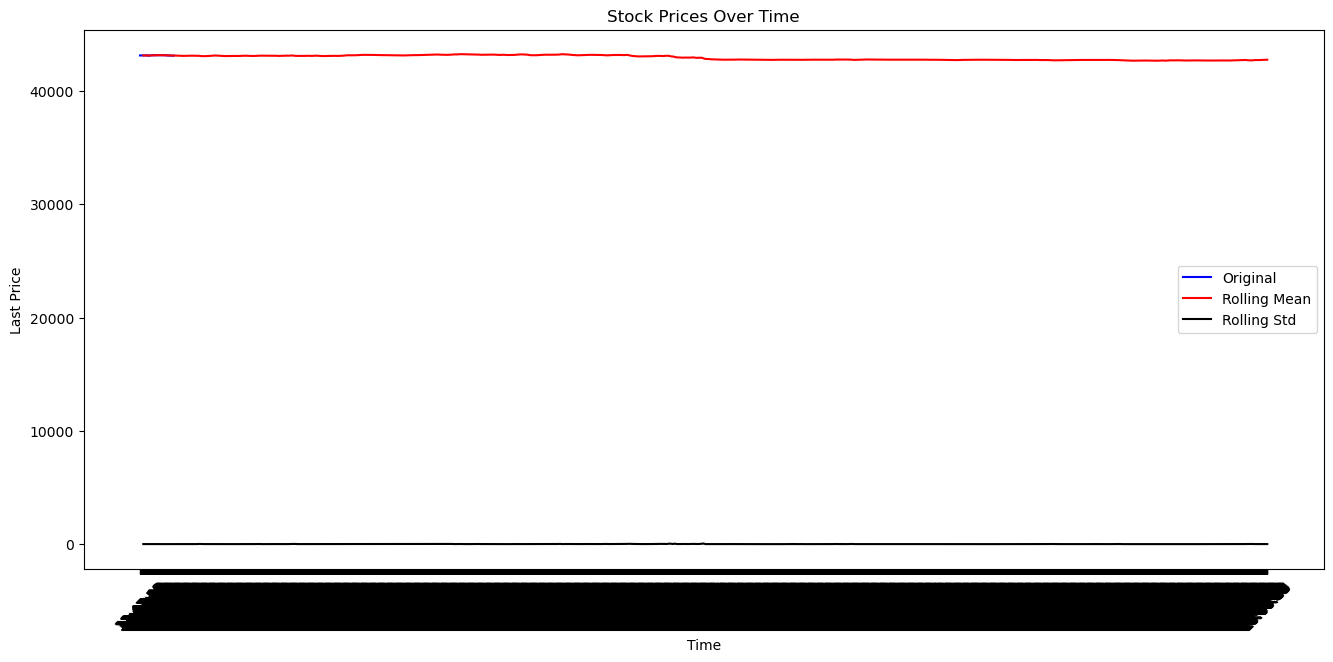

In [12]:
rolmean = df['last_price'].rolling(window=30).mean()
rolstd = df['last_price'].rolling(window=30).std()

plt.figure(figsize=(16, 7))
plt.plot(df['last_price'][:300], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, '\nAdditive Decompose')

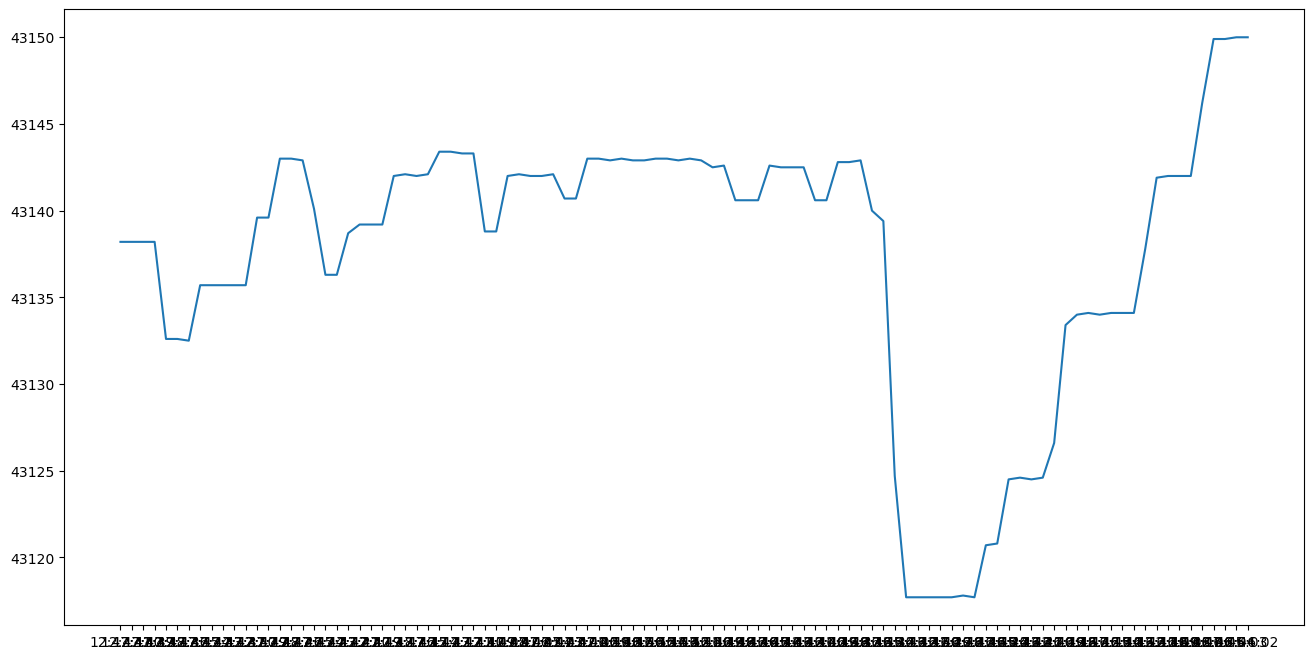

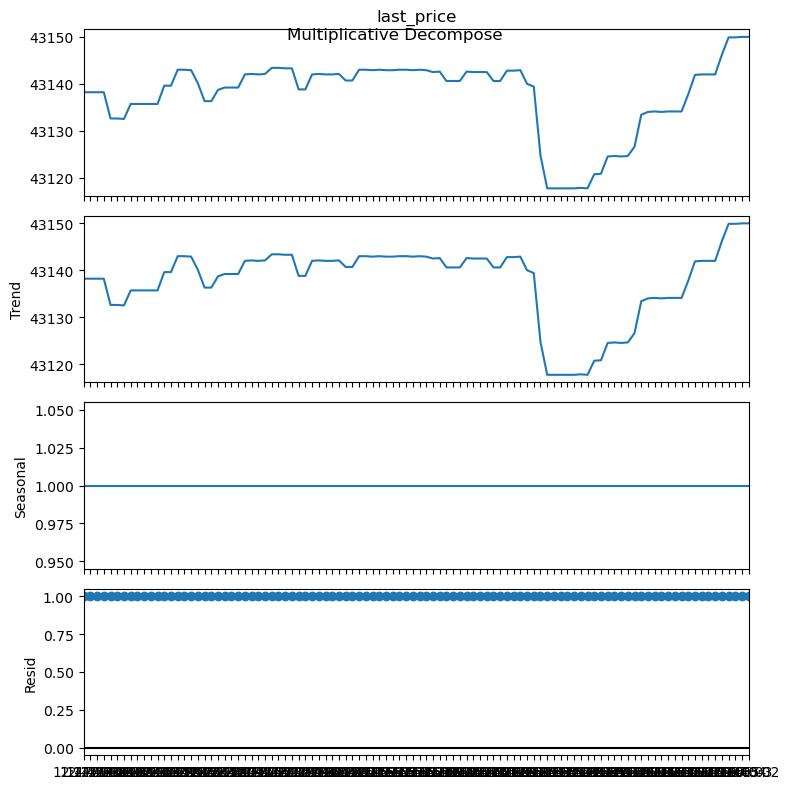

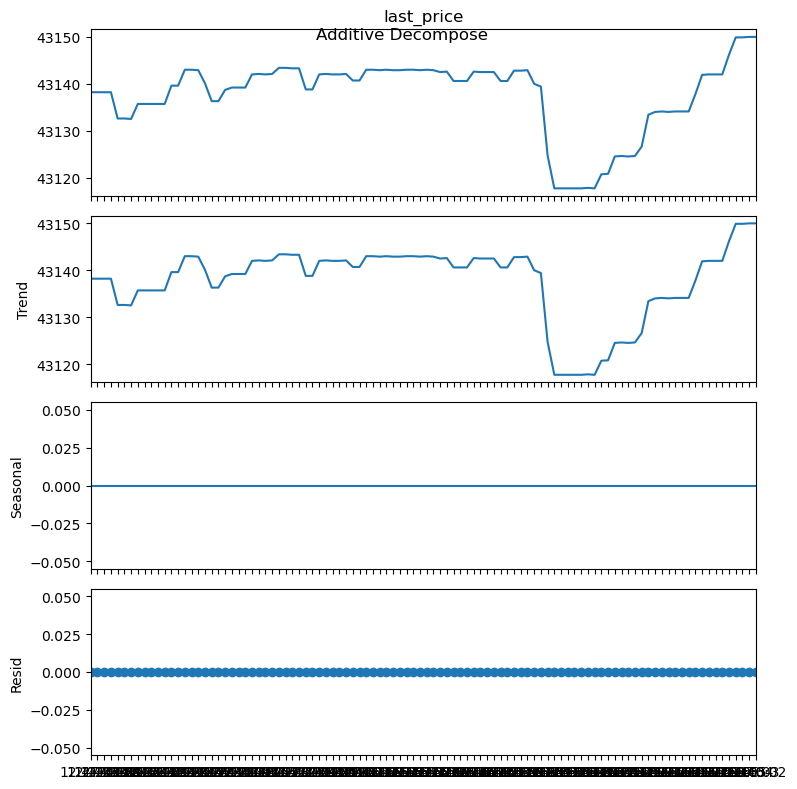

In [13]:
plt.rcParams.update({'figure.figsize': (16, 8)})
plt.plot(df['last_price'][:100])

mul_result = seasonal_decompose(df['last_price'][:100], model='multiplicative', period=1)
ad_result = seasonal_decompose(df['last_price'][:100], model='additive', period=1)

plt.rcParams.update({'figure.figsize': (8, 8)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

plt.rcParams.update({'figure.figsize': (8, 8)})
ad_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

In [14]:
adf_result = adfuller(df['last_price'], autolag='AIC')
print('ADF value:', adf_result[0])
print('P-value:', adf_result[1])

ADF value: -0.8180374711596146
P-value: 0.8137661953368731


In [15]:
df.drop('date', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

In [16]:
df.head()

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [48]:
df['previous_last_price'] = df['last_price'].shift()

In [49]:
df['price_change'] = df['last_price'] > df['previous_last_price']
#threshold = 0.0001

In [50]:
df['mapping']=df['price_change'].map({True:1, False:0})

In [53]:
X=df.drop(['price_change','previous_last_price',"last_price","id","mapping","created_at"],axis=1)
y=df.mapping

In [54]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features (optional but often beneficial)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


'\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

In [ ]:
# Create and train the Support Vector Classification (SVC) model
model = SVC(kernel='linear')  # You can experiment with other kernels
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"Mean Squared Error: {mse:.2f}")
#print(f"R-squared: {r2:.2f}")

accuracy= accuracy_score(y_test ,y_pred)
print(f'accuracy:{accuracy}')

In [28]:
df


,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f155,f156,f157,f158,f159,f160,f161,previous_last_price,price_change,mapping
0,55466910,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,NaN,False,0
1,55466909,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,43138.2,False,0
2,55466908,43138.2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,43138.2,False,0
3,55466907,43138.2,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,...,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,43138.2,False,0
4,55466906,43132.6,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,...,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6,43138.2,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55456903,42753.6,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,42758.0,False,0
9996,55456902,42753.6,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,42753.6,False,0
9997,55456901,42753.6,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,...,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2,42753.6,False,0
9998,55456900,42753.7,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,...,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3,42753.6,True,1


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('Trading-features.csv')

# Clean the data
df.dropna(inplace=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

# Create a binary target variable
df['previous_last_price'] = df['last_price'].shift()
df['price_change'] = df['last_price'] > df['previous_last_price']
df['mapping'] = df['price_change'].map({True: 1, False: 0})
y = df['mapping']
X = df.drop(['price_change', 'previous_last_price', 'last_price', 'id', 'mapping'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Classification (SVC) model
model = SVC(kernel='linear')  # You can experiment with other kernels
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.68
Confusion Matrix:
[[2697    0]
 [1295    0]]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('Trading-features.csv')

# Clean the data
df.dropna(inplace=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

# Create a binary target variable
df['previous_last_price'] = df['last_price'].shift()
df['price_change'] = df['last_price'] > df['previous_last_price']
df['mapping'] = df['price_change'].map({True: 1, False: 0})
y = df['mapping']
X = df.drop(['price_change', 'previous_last_price', 'last_price', 'id', 'mapping'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)


Random Forest Accuracy: 0.64
Random Forest Confusion Matrix:
[[2251  446]
 [1002  293]]


In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train the Random Forest Classifier model with hyperparameter tuning
rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

print(f'Tuned Random Forest Accuracy: {accuracy_rf_tuned:.2f}')
print('Tuned Random Forest Confusion Matrix:')
print(conf_matrix_rf_tuned)
print('Best Parameters:', best_params)


Tuned Random Forest Accuracy: 0.67
Tuned Random Forest Confusion Matrix:
[[2600   97]
 [1206   89]]
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [29]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1:2].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')